<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Week 8 Review - Solutions

 _**Author:** Noelle B. (DSI-DEN)_

---
We will review the learning objectives of each lesson this week and answer questions related to them.

---
## 7.05 Pipelines & Cross-Validation in Spark

**Q1.** What is one difference between using a pipeline in Python and using a pipeline in Spark?

> **Answer:** 
In python, you can instantiate the models within the pipeline. In Spark using Scala, you have to instantiate each item you want to use in the pipeline individually and then call them all in order later on when you build your pipeline.

**Q2.** What would the Scala code be to build a pipeline in Spark assuming you have the following already defined:
- tokenizer
- remover
- vectorizer
- assembler
- lr

> **Answer:** 

```Scala
var pipe = new Pipeline()
    .setStages(Array(tokenizer, remover, vectorizer, assembler, lr))
```

---
## 8.01 Intro to Clustering: k-Means

### Understand basic unsupervised clustering problems.

**Q3.** Describe unsupervised learning to a non-technical co-worker.

> **Answer:**  
Unsupervised learning is when you are trying to discover patterns within a dataset that does not have a target variable.

### Perform a k-means clustering analysis.

**Q4.** Perform a k-means clustering analysis on the breast cancer dataset (`bc_df` dataframe). Evaluate your clusters for fit.

In [1]:
# imports
import pandas as pd
import numpy as np
# data imports
from sklearn.datasets import load_breast_cancer
# visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
# modeling imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# evaluation imports
from sklearn.metrics import silhouette_score

#load in breast cancer dataset for clustering - we will just use 2 features
bc = load_breast_cancer()
bc_all = pd.DataFrame(bc.data, columns = bc.feature_names)
bc_df = bc_all[['mean radius', 'mean smoothness']]

In [2]:
# Answer:

# Scale
sc = StandardScaler()
X_sc = sc.fit_transform(bc_df)

# instantiate & fit kmeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

# create dataframe with labels for plotting
kbc_df = bc_df.copy()
kbc_df['kcluster'] = km.labels_
kbc_df.head()

,mean radius,mean smoothness,kcluster
0,17.99,0.11840,1
1,20.57,0.08474,1
2,19.69,0.10960,1
3,11.42,0.14250,2
4,20.29,0.10030,1


<Figure size 504x504 with 0 Axes>

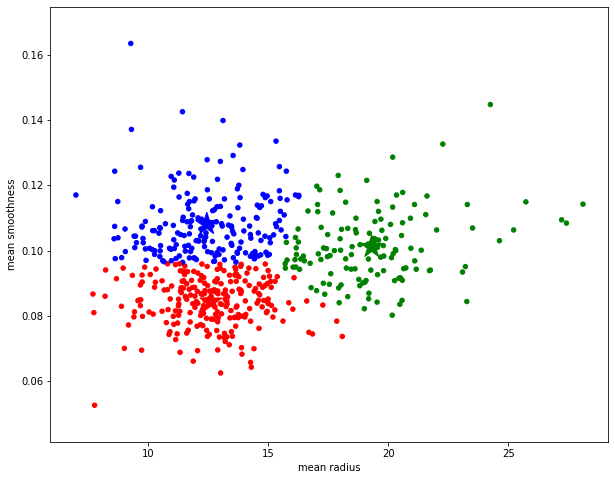

In [3]:
plt.figure(figsize=(7,7));

## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["mean radius", "mean smoothness"]
)

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
kbc_df['color'] = kbc_df['kcluster'].map(lambda p: colors[p])

ax = kbc_df.plot(    
    kind="scatter", 
    x="mean radius", y="mean smoothness",
    figsize=(10,8),
    c = kbc_df['color']
)

centroids.plot(
    kind="scatter", 
    x="mean radius", y="mean smoothness", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [4]:
# evaluate
silhouette_score(X_sc, km.labels_)

0.4113077227911611

### Evaluate clusters for fit (ie, tune k).

**Q5.** How do you choose the best value for k?

> **Answer:** (from global lesson 8.01):  
There is no closed-form solution here, but you can:
- Make an educated guess
    - Industry knowledge (there are five kinds of Democrats...)
    - Visualization (probably impossible if you have more than 2 variables)
- Judge based on a pseudo-evaluation metric, like the silhouette score.
- If you're using the resulting cluster labels as input to a supervised learning method later, you can tune $k$ to have the best supervised learning model. This is transfer learning.

---
## 8.02 DBSCAN Clustering

### Describe the effect of `epsilon` and `min_samples` on DBSCAN

**Q6.** Describe the effect of `epsilon` and `min_samples` on DBSCAN.

> **Answer:**  
- `epsilon`: Specifies how close points should be to each other to be considered a part of a cluster.
- `min_samples`: Specifies the minimum number of observations needed to be considered part of a cluster.

### Implement DBSCAN

**Q7.** Perform a DBSCAN clustering analysis on the breast cancer (`bc_df`) dataset. Evaluate your clusters for fit.

In [5]:
# imports
import pandas as pd
import numpy as np
# data imports
from sklearn.datasets import load_breast_cancer
# visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
# modeling imports
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# evaluation imports
from sklearn.metrics import silhouette_score

#load in breast cancer dataset for clustering - we will just use 2 features
bc = load_breast_cancer()
bc_all = pd.DataFrame(bc.data, columns = bc.feature_names)
bc_df = bc_all[['mean radius', 'mean smoothness']]

In [6]:
# Answer:
# scale
ss = StandardScaler()
X_scaled = ss.fit_transform(bc_df)

# instantiate & fit
dbscan = DBSCAN()
dbscan.fit(X_scaled);

# create dataframe with labels for plotting
dbc_df = bc_df.copy()
dbc_df['dcluster'] = dbscan.labels_
dbc_df.head()

,mean radius,mean smoothness,dcluster
0,17.99,0.11840,0
1,20.57,0.08474,0
2,19.69,0.10960,0
3,11.42,0.14250,-1
4,20.29,0.10030,0


<Figure size 504x504 with 0 Axes>

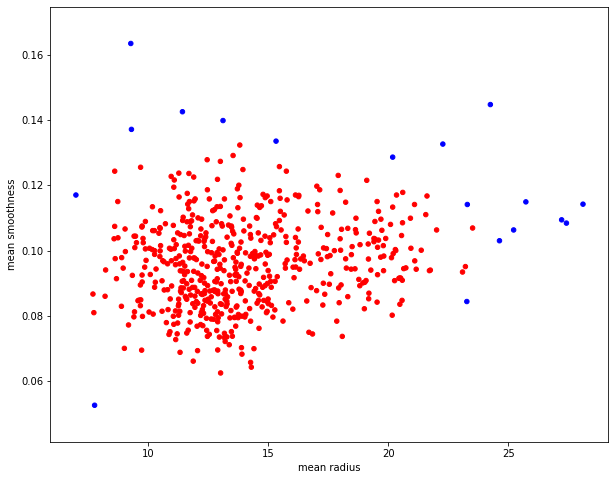

In [7]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
dbc_df['color'] = dbc_df['dcluster'].map(lambda p: colors[p])

ax = dbc_df.plot(    
    kind="scatter", 
    x="mean radius", y="mean smoothness",
    figsize=(10,8),
    c = dbc_df['color']
);

In [8]:
# evaluate
silhouette_score(X_scaled, dbscan.labels_)

0.5150508940918807

### Identify advantages and disadvantages of DBSCAN

**Q8.** What are advantages of DBSCAN?

> **Answer:**  
- DBSCAN does really well when there is clear "separation" within your dataset
- Works well on data that does not work well with k-Means

**Q9.** What are disadvantages of DBSCAN?

> **Answer:**  
- DBSCAN is dependent on consistent density (one eps to rule them all)
- DBSCAN is also dependent on clear separation of the clusters within your dataset

---
## 8.03 PCA

### Differentiate between feature elimination and feature extraction

**Q10.** What is the difference between feature elimination and feature extraction?

> **Answer:**  
Feature selection is a process of dropping original features from our model. Feature extraction is a process of transforming our original features into "new" features, then dropping some of the "new" features from our model.

### Describe the PCA algorithm

**Q11.** Describe what PCA is and why you would use it.

> **Answer:**  
**Principal component analysis** is one algorithm for doing feature extraction. It works by finding linear combinations of the features that explain the most variance in the data. these linear combinations can then be used for modeling.

###  Implement PCA in scikit-learn

**Q12.** Perform PCA on the entire breast cancer dataset (`bc_all`). How much variance does the first principal componant explain?

In [10]:
# imports
import pandas as pd
import numpy as np
# data imports
from sklearn.datasets import load_breast_cancer
# modeling imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#load in breast cancer dataset for clustering - we will just use 2 features
bc = load_breast_cancer()
bc_all = pd.DataFrame(bc.data, columns = bc.feature_names)

In [11]:
# Answer:
# scale
ss = StandardScaler()
Z = ss.fit_transform(bc_all)

# instantiate & fit
pca = PCA()
pca.fit(Z)
Z_pca = pca.transform(Z)

var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20],3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20],3)}')

Explained variance (first 20 components): [0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012 0.01  0.009
 0.008 0.005 0.003 0.003 0.002 0.002 0.002 0.001]

Cumulative explained variance (first 20 components): [0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94  0.952 0.961 0.97
 0.978 0.983 0.986 0.989 0.991 0.993 0.995 0.996]


### Calculate and interpret proportion of explained variance

**Q13.** After doing PCA, you see that your first principal component explained variance ratio is 0.443. What does this mean?

> **Answer:**   
This means that the first principal component explains 44.3% of the variance. This tells us how much information (variance) is captured by the first principal component.

### Identify use cases for PCA

**Q14.** What is a use case for PCA?

>**Answer:** 
- A form of dimensionality reduction to use with a supervised learning model
- From global lesson 8.03:
    - Situations where $p \not\ll n$. (Situations where $p$ is not substantially smaller than $n$.)
    - Situations in which there are variables with high multicollinearity. (Can be traditional models or models with highly correlated inputs by design, like images.)
    - Situations in which there are many variables, even without explicit multicollinearity.

---
## 8.04 Transfer Learning

### Define transfer learning

**Q15.** Define transfer learning.

> **Answer:**  
The process of storing knowledge gained while solving one problem and applying it to another problem - we often use it by performing some unsupervised method to a dataset (PCA, clustering, etc.) and using the results to complete a supervised problem.

### Identify situations in which transfer learning can apply

**Q16.** When would you use transfer learning?

> **Answer:**  
When you want to reduce features or find some pattern in your dataset before prediction.

### Use pipelines and gridsearch to do transfer learning with PCA & Apply clustering to transfer learning

**Q17.** Use gridsearch over a pipeline to perform PCA on the breast cancer dataset and fit a logistic regression model to predict whether or not the tumor is malignant. What is the best number of Principal Components?

In [18]:
# imports
import pandas as pd
import numpy as np
# data imports
from sklearn.datasets import load_breast_cancer
# modeling imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

bc = load_breast_cancer()
X = pd.DataFrame(bc.data, columns = bc.feature_names)
y = bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [23]:
# pipeline
pipe = Pipeline([
    ("sc", StandardScaler()),
    ("pc", PCA()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=500))
])

# params
pgrid = {"pc__n_components": range(1, 30, 2)}
gs = GridSearchCV(
    estimator=pipe,
    param_grid=pgrid,
    cv=5
)

# fit
gs.fit(X_train, y_train);
print("best number of principal components:", gs.best_params_)
print("")
print("training accuracy:", gs.best_score_)
print("testing accuracy:", gs.score(X_test, y_test))

best number of principal components: {'pc__n_components': 13}

training accuracy: 0.9773869346733668
testing accuracy: 0.9824561403508771


---
## 8.05 Missing Data

**Q18.** What do MCAR, MAR and NMAR stand for?

>**Answer:**   
- Missing completely at random
- Missing at random
- Not missing at random

**Q19.** What are pros & cons of mean/median/mode imputation?

>**Answer:**  
- Pros: Very easy to implement and comprehend.
- Cons: Significantly distorts histogram, underestimates variance, invalid method.

---
## 8.06 Recommender Systems

### Understand Cosine Similarity

**Q20.** What is cosine similarity and when would you use it?

>**Answer:**   
Cosine similarity is a measure of the distance between two vectors, found taking the cosine of the angles between them.

### Explain the math behind recommendation engines & Create an item-based movie recommender

**Q21.** What is a recommender system?

>**Answer:**  
A recommender system is a system that attempts to find similarities between users or products using ratings or preferences.